In [5]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import scipy as sp
c = sp.constants.c # speed of light in SI
h = sp.constants.h # plank constant in SI
k = sp.constants.k # boltzmann constant in SI
sigma = sp.constants.Stefan_Boltzmann # in SI
# importing and setting our constants

### Q3: Show that in eqn (5), the integration of B over ν can be written as:

$B = \frac{2hc^2\nu^3}{e^{\frac{hc\nu}{kt}}-1} $   (1)

$ W = \pi \int_{0}^{\infty}Bd\nu = C_1 \int_{0}^{\infty}\frac{x^{3}}{e^x -1} dx$ (2)

Answer:

Let $x = \frac{hc\nu}{kt}$, the denomenator in (1) becomes:

$B = \frac{2hc^{2}\nu^{3}}{e^{x}-1} $, now we just have to adjust the numerator!

Rewriting again,

$B = \frac{C_1x^3}{e^x-1} = \frac{2hc^{2}\nu^{3}}{e^{x}-1} (?)$
 This is only true if we can show the numerators are equal!
 
$x^{3} = (\frac{hc\nu}{kt})^{3} \rightarrow \frac{h^3c^3\nu^3}{k^3t^3}$

$ \rightarrow  C_1 x^3 = C_1\frac{h^3c^3\nu^3}{k^3t^3}= 2hc^{2}\nu^{3}$

$\rightarrow C_1 \frac{h^3c^3\nu^3}{k^3t^3} = 2hc^{2}\nu^{3}$

$C_1  = \frac{2k^3t^3}{h^2c}$ 
For this choice of $C_1$ it works!

### Part B
Write a program to calculate the value for W given the temperature T. Explain
the method used to integrate over the infinite range, and give an estimate for the
accuracy of the method.

15.154262241479259

In [87]:
# we shall use scipy's quad method 


# define f(x) the integrand 
def black_body_integrand(x, T=100):
    C_1 = 2*(k * T)**3 /( h**2 *c )
    #C_1 * x**3 / ( np.exp(x)-1)
    #print(x)
    return C_1 * x**3 / ( np.exp(x)-1)

# integrate 
T=50000
W = sp.integrate.quad(black_body_integrand, a=0, 
                     b=np.inf, args=(T))

# wrapper



/tmp/ipykernel_9550/1097256765.py:9: RuntimeWarning: overflow encountered in exp
  return C_1 * x**3 / ( np.exp(x)-1)


In [ ]:
T_max = int(1e5)
w_arr = np.empty(T_max)
sigma_arr = np.empty(T_max)
for i in range(1, T_max):
    W = sp.integrate.quad(black_body_integrand, a=0, 
                     b=np.inf, args=(i))
    w_arr[i] = W[0]
    sigma_arr[i] = W[0] * i**-4

/tmp/ipykernel_9550/1097256765.py:9: RuntimeWarning: overflow encountered in exp
  return C_1 * x**3 / ( np.exp(x)-1)


In [119]:
np.mean(sigma_arr)

3.139729831074123e-14

In [106]:
sigma

5.670374419e-08

In [94]:
# W should be 
print('W should be ', sigma * T**4)
print('W is ', W[0])


W should be  566810660.9432184
W is  259.61215294594075


In [46]:
print(sigma, '\n', W)

5.670374419e-08 
 (1.3329817349620558e-17, 5.189839584058696e-31)


In [47]:
# W = sigma T**4
print( W[0]* T**-4)

1.3329817349620556e-29


/tmp/ipykernel_9550/4162932690.py:7: RuntimeWarning: invalid value encountered in true_divide
  return C_1 * x**3 / ( np.e**x -1)


Text(0, 0.5, 'Magnitude')

/home/afinemax/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


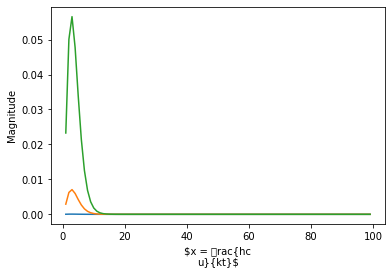

In [18]:
x_arr = np.arange(0, 100)
y_arr1 = black_body_integrand(x_arr, T=100)
y_arr2 = black_body_integrand(x_arr, T=500)
y_arr3 = black_body_integrand(x_arr, T=1000)
plt.plot(x_arr, y_arr1)
plt.plot(x_arr, y_arr2)
plt.plot(x_arr, y_arr3)
plt.xlabel('$x = \frac{hc\nu}{kt}$')
plt.ylabel('Magnitude')
#plt.yscale('log')

In [ ]:
# estimation of stefan boltzman constant\ 